In [1]:
import pandas as pd
import sys
import numpy as np
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "src"))
import utils
import ast
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_metrics(curve_path):
    df = pd.read_csv(curve_path, index_col=0)
    c = df.iloc[1,0].split()[1:-1]
    c = [float(num) for num in c]
    pr = df.iloc[0,1].split()[1:-1]
    pr = [float(num) for num in pr]
    f1 = df.iloc[1,1].split()[1:-1]
    f1 = [float(num) for num in f1]
    p = df.iloc[2,1].split()[1:-1]
    p = [float(num) for num in p]
    r = df.iloc[3,1].split()[1:-1]
    r = [float(num) for num in r]
    fmax = np.max(f1)
    cmax = c[np.argmax(f1)]
    df = pd.DataFrame(np.c_[c, p, r, f1], columns=["conf", "precision", "recall", "f1"])
    df['diff'] = abs(df['precision'] - df['recall'])
    eq = df.loc[df['diff'].idxmin(), ['conf', "recall"]]
    c_eq = eq.conf
    pr_eq = eq.recall
    print(f'The confidence threshold where "precision" and "recall" are the closest is: {c_eq} @ {pr_eq}')
    print(f'The confidence threshold where "F1" is at its maximum is: {cmax} @ {fmax}')
    return df, fmax, cmax, c_eq, pr_eq

## Run12

In [11]:
run12_png_c = r"..\output\validation\detect\run12+_png\validation_output_curves.csv"
run12_png_f_c = r"..\output\validation\detect\run12+_png_full_test\validation_output_curves.csv"
run13_tiled = r"..\output\validation\detect\run13-tiled\run13-tiled_curves.csv"

In [12]:
df12, fmax12, cmax12, c_eq12, pr_eq12 = get_metrics(run12_png_c)
dff, fmaxf, cmaxf, c_eqf, pr_eqf = get_metrics(run12_png_f_c)
dft, fmaxt, cmaxt, c_eqt, pr_eqt = get_metrics(run13_tiled)

The confidence threshold where "precision" and "recall" are the closest is: 0.35836 @ 0.80371
The confidence threshold where "F1" is at its maximum is: 0.37838 @ 0.80546
The confidence threshold where "precision" and "recall" are the closest is: 0.36436 @ 0.71309
The confidence threshold where "F1" is at its maximum is: 0.44745 @ 0.7209
The confidence threshold where "precision" and "recall" are the closest is: 0.26226 @ 0.79162
The confidence threshold where "F1" is at its maximum is: 0.3013 @ 0.79484


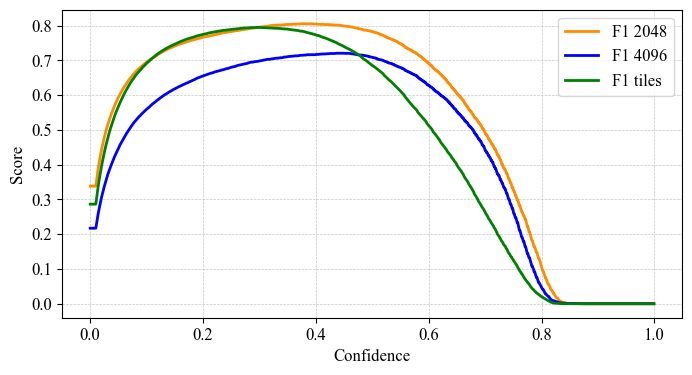

In [13]:
# Update rcParams for Times New Roman font globally
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 4))
# plt.plot(df12.conf, df12.f1, label="F1 score", linestyle='-',marker = "", linewidth=2, color='royalblue')
plt.plot(df12.conf, df12.f1, label="F1 2048", linestyle='-', linewidth=2, color='darkorange')
plt.plot(dff.conf, dff.f1, label="F1 4096", linestyle='-', linewidth=2, color='blue')
plt.plot(dft.conf, dft.f1, label="F1 tiles", linestyle='-', linewidth=2, color='green')
# plt.plot(dfft.conf, dfft.f1, label="F1 tiles 4096", linestyle='-', linewidth=2, color='black')

# plt.annotate(f'Max F1\n{f1max:.2f} @ {cmax:.3f} confidence', xy=(cmax, f1max), xytext=(cmax+0.09, f1max-.3), arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='black')
# plt.annotate(f'Precision~Recall\n{pr_eq:.2f} @ {c_eq:.3f} confidence', xy=(c_eq, pr_eq), xytext=(c_eq-0.3, pr_eq-0.3), arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='black')
plt.xlabel('Confidence') 
plt.ylabel('Score')
# plt.title(f'F1-score, precision, and recall curves')

plt.legend(loc='best', frameon=True)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# plt.savefig(r"..\output\validation\detect\GoPro_round2_validation\scores.png", dpi=600, bbox_inches = "tight", transparent=True)
plt.show()

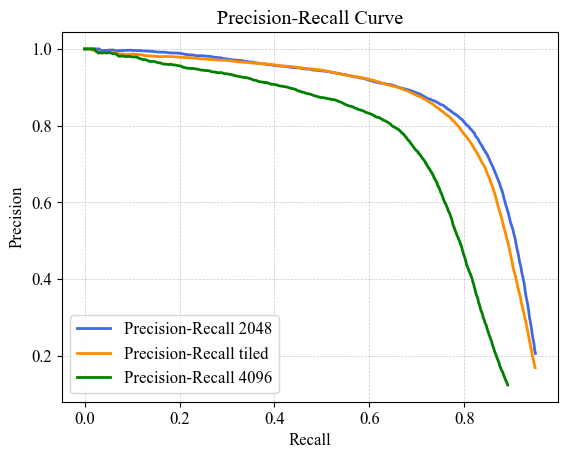

In [15]:
plt.plot(df12.recall, df12.precision, label="Precision-Recall 2048", color='royalblue', linewidth=2)
plt.plot(dft.recall, dft.precision, label="Precision-Recall tiled", color='darkorange', linewidth=2)
plt.plot(dff.recall, dff.precision, label="Precision-Recall 4096", color='green', linewidth=2)
# plt.plot(dfft.recall, dfft.precision, label="Precision-Recall tiled 4096", color='black', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


# Balanced Test Analysis

In [ ]:
# bal_test_curves = r"validation\detect\balanced_test_init\balanced_test_init_curves.csv"
year = 2021
bal_test_curves = f"validation\\detect\\balanced_test_init_{year}\\balanced_test_init_{year}_curves.csv"
dfb, f1b_max, cb_max, c_eq, pr_eq= get_metrics(bal_test_curves)

plt.plot(dfb.conf, dfb.f1, label="F1 score")
plt.plot(dfb.conf, dfb.precision, label="precision")
plt.plot(dfb.conf, dfb.recall, label="recall")
cmax, f1max = cb_max, f1b_max
plt.annotate(f'Max F1\n({cmax:.3f}, {f1max:.2f})', xy=(cmax, f1max), xytext=(cmax+0.09, f1max-.3), arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='black')
plt.annotate(f'Precision~Recall\n({c_eq:.3f}, {pr_eq:.2f})', xy=(c_eq, pr_eq), xytext=(c_eq-0.3, pr_eq-0.3), arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='black')
plt.xlabel('confidence') 
plt.ylabel('f1') 
plt.title(f'f1-score, precision, and recall curves {year}')
plt.legend()

plt.show()

# GoPro

In [4]:
# gp1 = r"validation\detect\GoPro_round1_validation\GoPro_round1_validation_curves.csv"
gp1 = r"..\output\validation\detect\GoPro-qaqc1\GoPro-qaqc1_curves.csv"
gp2 = r"..\output\validation\detect\GoPro_round2_validation\GoPro_round2_validation_curves.csv"
df_gp1, f1max_gp1, cmax_gp1, c_eq_gp1, pr_eq_gp1 = get_metrics(gp1)
df_gp2, f1max_gp2, cmax_gp2, c_eq_gp2, pr_eq_gp2 = get_metrics(gp2)

The confidence threshold where "precision" and "recall" are the closest is: 0.18519 @ 0.88988
The confidence threshold where "F1" is at its maximum is: 0.16617 @ 0.89067
The confidence threshold where "precision" and "recall" are the closest is: 0.32232 @ 0.87934
The confidence threshold where "F1" is at its maximum is: 0.38939 @ 0.88069


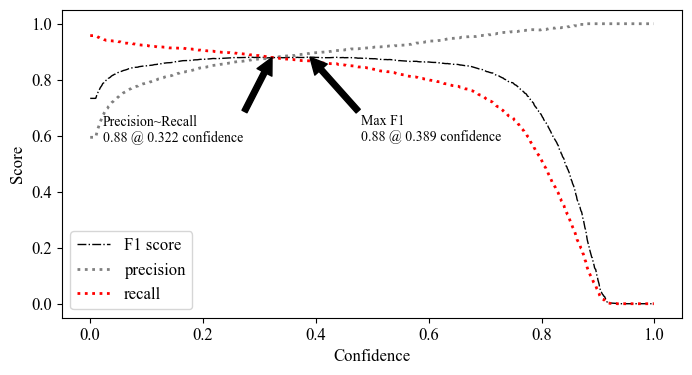

In [ ]:
# Update rcParams for Times New Roman font globally
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 4))
plt.plot(df_gp2.conf, df_gp2.f1, label="F1 score", linestyle='-.',marker = "", linewidth=1, color='black')
plt.plot(df_gp2.conf, df_gp2.precision, label="precision", linestyle=':', linewidth=2, color='gray')
plt.plot(df_gp2.conf, df_gp2.recall, label="recall", linestyle=':', linewidth=2, color='red')
cmax, f1max = cmax_gp2, f1max_gp2
c_eq = c_eq_gp2
pr_eq = pr_eq_gp2
plt.annotate(f'Max F1\n{f1max:.2f} @ {cmax:.3f} confidence', xy=(cmax, f1max), xytext=(cmax+0.09, f1max-.3), arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='black')
plt.annotate(f'Precision~Recall\n{pr_eq:.2f} @ {c_eq:.3f} confidence', xy=(c_eq, pr_eq), xytext=(c_eq-0.3, pr_eq-0.3), arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='black')
plt.xlabel('Confidence') 
plt.ylabel('Score')
# plt.title(f'F1-score, precision, and recall curves')

plt.legend(loc='best', frameon=True)
# plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.savefig(r"..\output\validation\detect\GoPro_round2_validation\scores.png", dpi=600, bbox_inches = "tight", transparent=True)
plt.show()

In [ ]:
df_gp2.to_csv(r"validation/detect/GoPro-Round2/validation.csv", index=False)

In [ ]:
plt.plot(df_gp1.conf, df_gp1.f1, label="F1-round1")
plt.plot(df_gp2.conf, df_gp2.f1, label="F1-round2")
# plt.plot(df_gp1.conf, df_gp1.precision, label="precision-round1")
# plt.plot(df_gp1.conf, df_gp1.recall, label="precision-round1")
# plt.plot(df_gp2.conf, df_gp2.precision, label="precision-round2")
# plt.plot(df_gp2.conf, df_gp2.recall, label="recall-round2")
# GoPro QAQC round 1
plt.annotate(f'Max value\n({cmax_gp1:.2f}, {f1max_gp1:.2f})', xy=(cmax_gp1, f1max_gp1), 
             xytext=(cmax_gp1-0.09, f1max_gp1-.3), 
             arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='cornflowerblue')
# GoPro QAQC round 2
plt.annotate(f'Max value\n({cmax_gp2:.2f}, {f1max_gp2:.2f})', 
             xy=(cmax_gp2, f1max_gp2), xytext=(cmax_gp2-0.09, f1max_gp2-.3), 
             arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='orange')
plt.xlabel('confidence') 
plt.ylabel('f1') 
plt.title('f1-score Curve GoPro')
plt.legend()

In [ ]:
plt.plot(df_gp1.precision, df_gp1.recall, label="QAQC round 1")
plt.plot(df_gp2.precision, df_gp2.recall, label="QAQC round 2")
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.title('GoPro Precision-Recall Curve')
plt.legend()